# 02 - Data Cleaning and Preprocessing

Now that we have a feel for the data, we will prepare the data through cleaning and preprocessing, taking into account our insights from the exploratory data analysis. After this step, we should have clean, informative, and consistently formatted data for our Feature Engineering step. 

## Imports & Loading Data

In [29]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns in pandas output (otherwise the columns are truncated)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [30]:
# Loading raw data into a data frame using Pandas
df = pd.read_csv('/Users/zulykathlucero/Desktop/predicting-employee-attrition/data/raw/HR-Employee-Attrition.csv')
# Printing the first couple of rows in the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Dropping Columns

Our exploratory data analysis revealed that five columns will not be valuable to our model. EmployeeCount, Over18, and StandardHours all have the same value for each observation in the dataset. The EmployeeNumber variable is an ID column and provides no insight into the characteristics of the employees. I will also be dropping PerformanceRating because our EDA found that this variable is not informative due to extreme class imbalance.

In [31]:
# Dropping Unnecessary Columns
drop_columns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', 'PerformanceRating']
df.drop(columns=drop_columns, inplace=True)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,4,1,6,3,3,2,2,2,2


## Missing Values

The EDA showed us that there were no missing values in our dataset, but we are confirming that as part of our cleaning process.

In [32]:
# Checking for null values
df.isnull().sum().sum()  

0

## Encoding Binary Variables

Some binary variables are represented using words, but since models prefer numbers, we will be encoding them using 1 and 0. I chose this instead of one-hot coding because adding columns will lead to unnesseary complexity when tree models already handle 1/0 natively.

In [33]:
# Encode Attrition and Overtime as binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,4,1,6,3,3,2,2,2,2


## One-Hot Encoding

Ordinal variables are already encoded as integers, so they will be kept that way. This will ensure that the models are able to interpret the variables as ranked levels. Nominal variables, however, will be one-hot encoded in order to represent the values numerically but not ordinally.

In [34]:
# Apply one-hot encoding to multi-class categorical variables
multi_cat_cols = [
    'Department',
    'BusinessTravel',
    'EducationField',
    'JobRole',
    'MaritalStatus'
]

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Research & Development,Department_Sales,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,1,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,2,0,7,3,3,0,0,0,0,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,4,1,6,3,3,2,2,2,2,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False


## Handling Outliers

In the EDA step, we identified 10 variables with outliers. Of those 10, 2 are ordinal and will not be changed. MonthlyIncome is extremely skewed and could distort the model so I will be using log-transform. The rest of the varaiables will be kept as is because the distribution is not extremely skewed and the outliers could be helpful in detecting stagnation and "job-hopping".

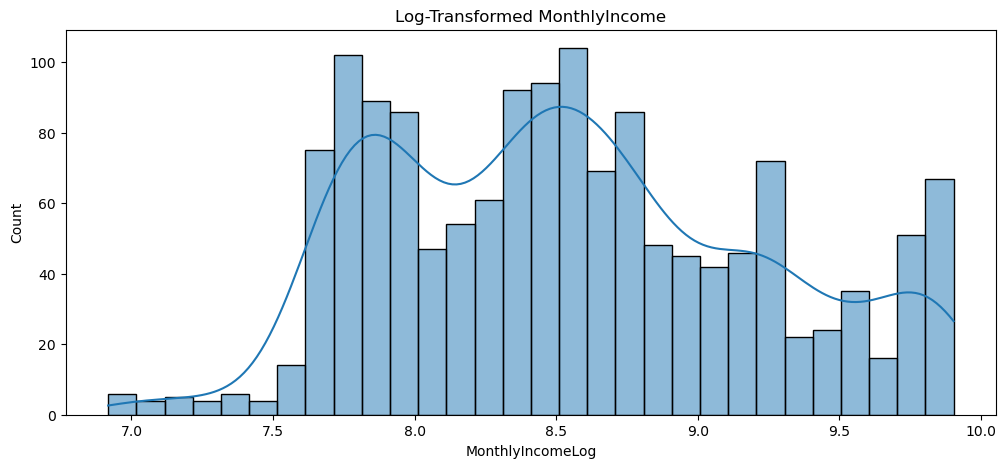

In [35]:
# Performing the transformation
df['MonthlyIncomeLog'] = np.log1p(df['MonthlyIncome'])
df.drop(columns='MonthlyIncome', inplace=True)

# Checking if transformation worked
plt.figure(figsize=(12, 5))
sns.histplot(df['MonthlyIncomeLog'], kde=True, bins=30)
plt.title("Log-Transformed MonthlyIncome")
plt.savefig('/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/monthlyincome_log_distribution.png')
plt.show()

## Saving the Cleaned Data

Now that we have cleaned the dataset to the best of our ability, we will save it to be used for the next steps of the data science pipeline.

In [36]:
df.to_csv('/Users/zulykathlucero/Desktop/predicting-employee-attrition/data/processed/cleaned_attrition_data.csv', index=False)

## Summary of Cleaning and Preprocessing Steps

- Dropped 5 insignificant or constant columns: 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber', and 'PerformanceRating'
- Confirmed no missing values in the dataset
- Encoded binary Variables: 'Attrition', 'OverTime', and 'Gender'
- Encoded multi-class categorical variables using one-hot encoding: 'Department', 'BusinessTravel', 'EducationField', 'JobRole', and 'MaritalStatus'
- Log-transformed skewed variable: 'MonthlyIncome'
- Saved final cleaned dataset to 'data/processed'